In [ ]:
%tensorflow_version 1.x
!pip install  keras==2.2.4
!pip install 'h5py==2.10.0' --force-reinstall

TensorFlow 1.x selected.
  Using cached Keras-2.2.4-py2.py3-none-any.whl (312 kB)
  Attempting uninstall: keras
    Found existing installation: keras 2.6.0
    Uninstalling keras-2.6.0:
      Successfully uninstalled keras-2.6.0
  Using cached h5py-2.10.0-cp37-cp37m-manylinux1_x86_64.whl (2.9 MB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Using cached numpy-1.21.4-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:
      Successfully uninstalled six-1.16.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.4
    Uninstalling numpy-1.21.4:
      Successfully uninstalled numpy-1.21.4
  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
      Successfully uninstalled h5py-2.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. Th

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:

import keras
import tensorflow as tf

print(keras.__version__)
print(tf.__version__)
import sys
print(sys.version)

Using TensorFlow backend.


2.2.4
1.15.2
3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]


In [ ]:
!git clone https://github.com/aadeshnpn/OSDN.git

!mv OSDN/utils/libmr.cpython-36m-x86_64-linux-gnu.so OSDN/utils/libmr.so
!mv OSDN/* .
!rm -r OSDN

Cloning into 'OSDN'...
remote: Enumerating objects: 87, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 87 (delta 23), reused 43 (delta 16), pack-reused 33
Unpacking objects: 100% (87/87), done.


In [ ]:
from keras.models import load_model
import numpy as np
from utils.openmax import get_train_test, create_model
from utils.openmax import image_show, compute_activation, compute_openmax

/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'libmr' does not match runtime version 3.7
  return f(*args, **kwds)


In [ ]:
np.random.seed(12345)

# Step 1: Train a CNN model for the dataset you choice

# We skip this step as we already trained MNIST dataset

# Step 2: Load the trained model
#model = load_model('data/MNIST_CNN.h5')
model = load_model('data/MNIST_CNN_tanh.h5')

# Step 3: Load the training data you trained the DNN model
data = get_train_test()
x_train, x_test, y_train, y_test = data

# Step 4: Create a mean activation vector (MAV) and do weibull fit model
# Send the trained model as argument and the test data you want to predict
# using the OSDN
create_model(model, data)

# Step 5: Pass the sample to compute activation and openmax
# Test on the openmax activation function to images from
# the same distribution
N = 5   # Testing N number of test images

0 (6943, 28, 28, 1)
1 (6811, 28, 28, 1)
2 (7286, 28, 28, 1)
3 (6862, 28, 28, 1)
4 (6305, 28, 28, 1)
5 (6816, 28, 28, 1)
6 (7133, 28, 28, 1)
7 (6980, 28, 28, 1)
8 (7871, 28, 28, 1)
9 (6899, 28, 28, 1)


Actual Label:  6
Prediction Softmax:  2
Prediction openmax:  7


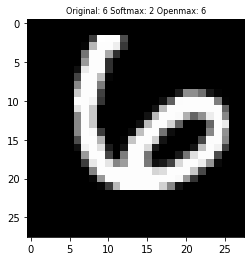

Actual Label:  7
Prediction Softmax:  7
Prediction openmax:  2


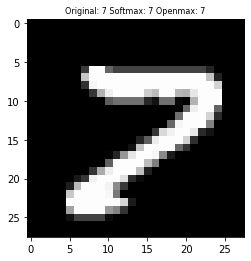

Actual Label:  2
Prediction Softmax:  3
Prediction openmax:  Unknown


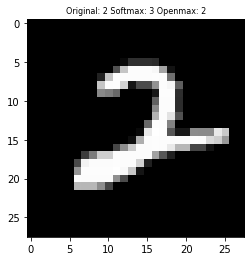

Actual Label:  0
Prediction Softmax:  3
Prediction openmax:  4


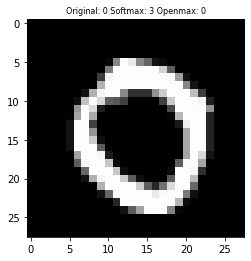

Actual Label:  9
Prediction Softmax:  5
Prediction openmax:  4


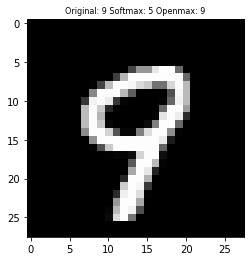

In [ ]:
for i in range(N):
  random_char = np.random.randint(0, len(x_test))

  test_x1 = x_test[random_char]
  test_y1 = y_test[random_char]

  # Compute fc8 activation for the given image
  activation = compute_activation(model, test_x1)

  # Compute openmax activation
  softmax, openmax = compute_openmax(model, activation)

  print('Actual Label: ', np.argmax(test_y1))
  print('Prediction Softmax: ', softmax)
  if openmax == 10:
      openmax = 'Unknown'
  print('Prediction openmax: ', openmax)
  labels = (np.argmax(test_y1), softmax, openmax)

  # Show the image
  image_show(test_x1, labels)

In [ ]:
# Step 6: Test the trained openmax to images from different distribution
# Opemax should return unknow to these types of images
# We are testing Nepali numerals on the model trained on MNIST
from utils.nepali_characters import split
import keras

train_x, train_y, test_x, text_y, valid_x, valid_y = split(0.9, 0.05, 0.05)
train_y = keras.utils.to_categorical(train_y, 10)
data = x_train, x_test, y_train, y_test
model = load_model('data/MNIST_CNN_tanh.h5')
create_model(model, data)

for i in range(N):
  random_char = np.random.randint(0, len(train_y))

  test_x1 = train_x[random_char]
  test_x1 = np.reshape(test_x1, (32, 32)).T
  test_y1 = train_y[random_char]

  # Compute fc8 activation for the given image
  activation = compute_activation(model, test_x1)

  # Compute openmax activation
  print(activation)
  softmax, openmax = compute_openmax(model, activation)

  print('Actual Label: ', np.argmax(test_y1))
  print('Prediction Softmax: ', softmax)
  if openmax == 10:
      openmax = 'Unknown'
  print('Prediction Openmax: ', openmax)
  labels = (np.argmax(test_y1), softmax, openmax)
  # Draw image
  image_show(test_x1, labels)

In [ ]:
np.random.seed(12345)

# Step 1: Train a CNN model for the dataset you choice

# We skip this step as we already trained MNIST dataset

# Step 2: Load the trained model
model = load_model('data/MNIST_CNN.h5')

# Step 3: Load the training data you trained the DNN model
data = get_train_test()
x_train, x_test, y_train, y_test = data

# Step 4: Create a mean activation vector (MAV) and do weibull fit model
# Send the trained model as argument and the test data you want to predict
# using the OSDN
create_model(model, data)

# Step 5: Pass the sample to compute activation and openmax
# Test on the openmax activation function to images from
# the same distribution
N = 5   # Testing N number of test images
for i in range(N):
    random_char = np.random.randint(0, len(x_test))

    test_x1 = x_test[random_char]
    test_y1 = y_test[random_char]

    # Compute fc8 activation for the given image
    activation = compute_activation(model, test_x1)

    # Compute openmax activation
    softmax, openmax = compute_openmax(model, activation)

    print('Actual Label: ', np.argmax(test_y1))
    print('Prediction Softmax: ', softmax)
    if openmax == 10:
        openmax = 'Unknown'
    print('Prediction openmax: ', openmax)
    labels = (np.argmax(test_y1), softmax, openmax)

    # Show the image
    image_show(test_x1, labels)

# Step 6: Test the trained openmax to images from different distribution
# Opemax should return unknow to these types of images
# We are testing Nepali numerals on the model trained on MNIST
from utils.nepali_characters import split
import keras

train_x, train_y, test_x, text_y, valid_x, valid_y = split(0.9, 0.05, 0.05)
train_y = keras.utils.to_categorical(train_y, 10)
data = x_train, x_test, y_train, y_test

for i in range(N):
    random_char = np.random.randint(0, len(train_y))

    test_x1 = train_x[random_char]
    test_x1 = np.reshape(test_x1, (32, 32)).T
    test_y1 = train_y[random_char]

    # Compute fc8 activation for the given image
    activation = compute_activation(model, test_x1)

    # Compute openmax activation
    softmax, openmax = compute_openmax(model, activation)

    print('Actual Label: ', np.argmax(test_y1))
    print('Prediction Softmax: ', softmax)
    if openmax == 10:
        openmax = 'Unknown'
    print('Prediction Openmax: ', openmax)
    labels = (np.argmax(test_y1), softmax, openmax)
    # Draw image
    image_show(test_x1, labels)

In [ ]:
model = load_model('data/MNIST_CNN.h5')
model.summary()

In [ ]:
model = load_model('data/MNIST_CNN_tanh.h5')
model.summary()

In [ ]:
# Some examples on CIFAR-10 
from keras.datasets import cifar10

# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
#print('x_train shape:', x_train.shape)
#print(x_train.shape[0], 'train samples')
#print(x_test.shape[0], 'test samples')


# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# x_train = x_train.astype('float32')
# x_test = x_test.astype('float32')
# # x_valid = x_valid.astype('float32')
# x_train /= 255.
# x_test /= 255.

import cv2
from skimage.color import rgb2gray

x1 = np.zeros((50000,28,28,3))
x2 = np.zeros((10000,28,28,3))

x3 = np.zeros((50000,28,28, 1))
x4 = np.zeros((10000,28,28, 1))

for i in range (50000):
  x1[i] = cv2.resize(x_train[i], (28,28))

for i in range (10000):
  x2[i] = cv2.resize(x_test[i], (28,28))

for i in range (50000):
  x3[i] = np.expand_dims(rgb2gray(x1[i]), -1)

for i in range (10000):
  x4[i] = np.expand_dims(rgb2gray(x2[i]), -1)

x_train = x3
x_test = x4

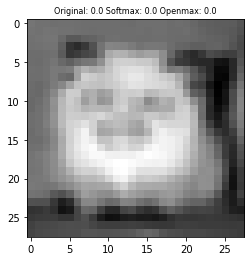

Actual Label:  3
Prediction Softmax:  0
Prediction Openmax:  5


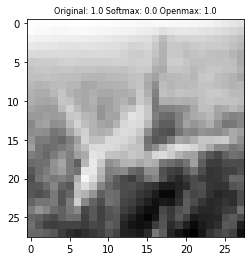

Actual Label:  0
Prediction Softmax:  8
Prediction Openmax:  Unknown


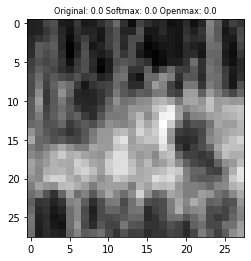

Actual Label:  2
Prediction Softmax:  8
Prediction Openmax:  Unknown


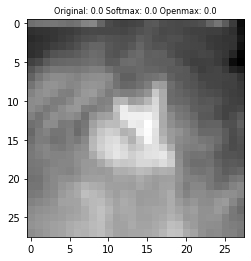

Actual Label:  3
Prediction Softmax:  8
Prediction Openmax:  Unknown


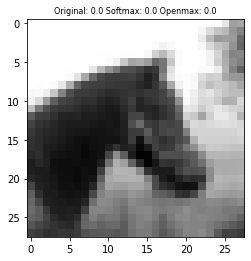

Actual Label:  7
Prediction Softmax:  2
Prediction Openmax:  7


In [ ]:


data = x_train, x_test, y_train, y_test
#create_model(model, data)

for i in range(5):
    random_char = np.random.randint(0,len(x_test))

    test_x1 = x_test[random_char]
    test_y1 = y_test[random_char]
    
    #from skimage.color import rgb2gray
    
    image_show(test_x1,test_y1)

    #test_x1 = rgb2gray(test_x1)
    #print (test_x1.shape)
    # Compute fc8 activation for the given image

    activation = compute_activation(model,test_x1)
    #print (activation)

    # Compute openmax activation

    softmax,openmax = compute_openmax(model,activation)
    #openmax_unknown_class(model)
    print ('Actual Label: ', np.argmax(test_y1))
    print ('Prediction Softmax: ', softmax)
    if openmax == 10:
        openmax = 'Unknown'
    print ('Prediction Openmax: ',openmax)

In [ ]:
asd = tf.image.resize(x_train, (28,28))

In [ ]:
import cv2

x1 = np.zeros((50000,28,28,3))
x2 = np.zeros((10000,28,28,3))

for i in range (50000)
  x1[i] = cv2.resize(x_train[i], (28,28))

for i in range (10000)
  x2[i] = cv2.resize(x_test[i], (28,28))

x_train = x1
x_test = x2